# Analyse Epoch vs Depth Data

We were also interested to see if the qubit number and circuit depth had any impact on the effect of entanglement of the system. This code imports the data collected from Epoch_vs_depth_without_CNOT.ipynb and Epoch_vs_depth_without_CNOT.ipynb and analyses it by creating a heat map in each case. This heat map demonstrates the average best test accuracy for each combination of qubit number and depth for each case. This is to analyse the effect of these two parameters on best test accuracy, and whether these parameters impact the results with and without the entangling CNOT gates. 


In [1]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [4]:
trainNCNOT = 'train_WOCNOT.pt'
valNCNOT = 'val_WOCNOT.pt'
trainCNOT = 'train_WCNOT.pt'
valCNOT = 'val_WCNOT.pt'

files = [trainNCNOT, valNCNOT, trainCNOT, valCNOT]
datas = []

for filename in files:
    test = open(filename,'rb')
    datas.append(pkl.load(test))
    test.close()
    

In [5]:
datasM = [np.mean(data,axis=2) for data in datas]

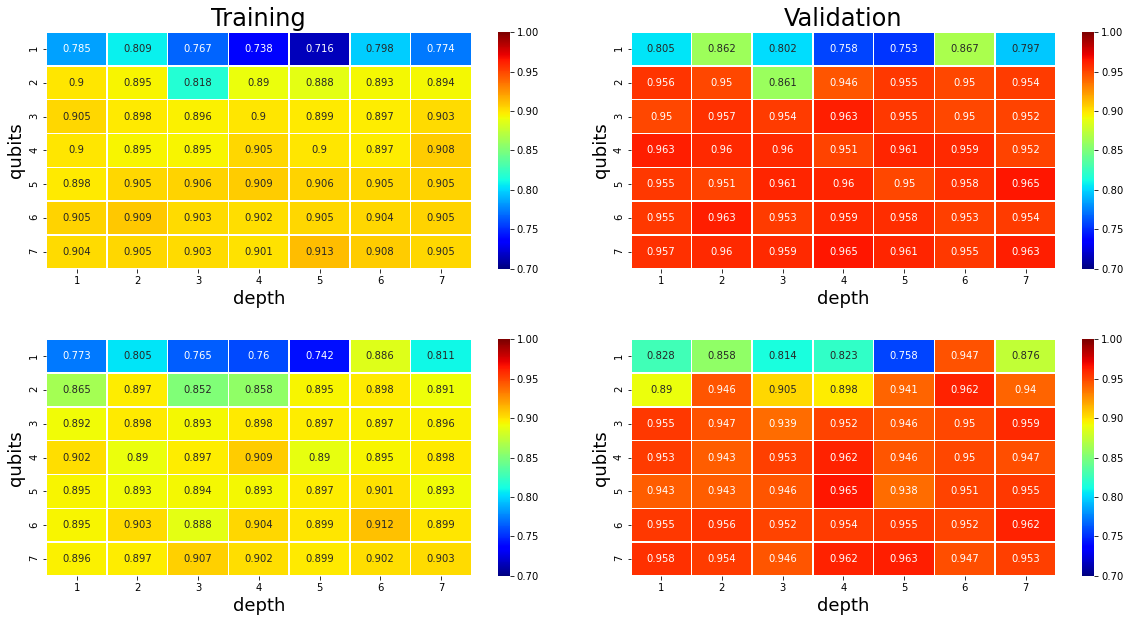

In [6]:
x_axis_labels =  np.arange(1,8)
y_axis_labels = np.arange(1,8)
vmin, vmax = 0.7, 1
cmap = 'jet'


fig = plt.figure(figsize=(20,10))

plt.subplot(2,2, 1)
ax1 = sns.heatmap(datasM[0], xticklabels=x_axis_labels, yticklabels=y_axis_labels, 
                 cmap=cmap, 
                 annot=True, linewidth=0.5,
                 vmin=vmin, vmax=vmax,
                 fmt='.3g')

ax1.title.set_text('Training')
ax1.title.set_size(24)


plt.ylabel('qubits', fontsize=18)
plt.xlabel('depth', fontsize=18)


plt.subplot(2,2, 2)
ax2 = sns.heatmap(datasM[1], xticklabels=x_axis_labels, yticklabels=y_axis_labels, 
                 cmap=cmap, 
                 annot=True, linewidth=0.5,
                 vmin=vmin, vmax=vmax,
                 fmt='.3g')


ax2.title.set_text('Validation')
ax2.title.set_size(24)

plt.ylabel('qubits', fontsize=18)
plt.xlabel('depth', fontsize=18)


plt.subplot(2,2, 3)
ax3 = sns.heatmap(datasM[2], xticklabels=x_axis_labels, yticklabels=y_axis_labels, 
                 cmap=cmap, 
                 annot=True, linewidth=0.5,
                 vmin=vmin, vmax=vmax,
                 fmt='.3g')


plt.ylabel('qubits', fontsize=18)
plt.xlabel('depth', fontsize=18)


plt.subplot(2,2, 4)
ax4 = sns.heatmap(datasM[3], xticklabels=x_axis_labels, yticklabels=y_axis_labels, 
                 cmap=cmap, 
                 annot=True, linewidth=0.5,
                 vmin=vmin, vmax=vmax,
                 fmt='.3g')

plt.ylabel('qubits', fontsize=18)
plt.xlabel('depth', fontsize=18)


plt.subplots_adjust(wspace=0.1, hspace=0.3)

plt.show()

fig.savefig('results.pdf')  

In [7]:
ax2.title.set_size(24)